In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [2]:
from fft_2to1 import load_image, computer_radial_profile, binning_data, power_law, residuals, fit_power_law, plot_pix_scale

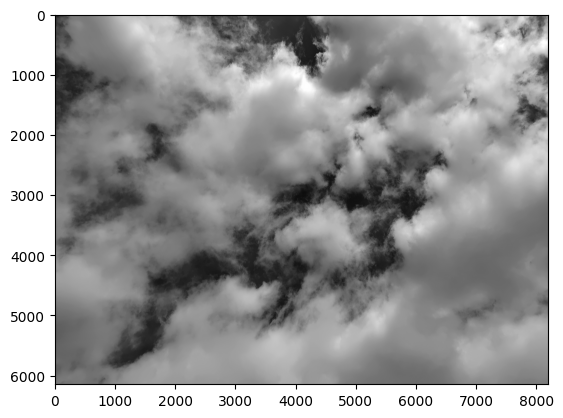

In [3]:
image = load_image('./kolmogorov_cloud.JPG')
plt.imshow(image, cmap='gray')

[ref. about the color conversion by cv2)](https://docs.opencv.org/4.2.0/de/d25/imgproc_color_conversions.html#color_convert_rgb_gray)

In [4]:
frequency, power = computer_radial_profile(image)
fbin, rbin, err = binning_data(frequency, power, bin_size=5)

/Users/hnakata/research/practice/statistics/fft_2to1.py:49: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


In [7]:
params, errors, chi2, dof, (fmin, fmax) = fit_power_law(fbin, rbin, err, xmin=1, xmax=-400)
print(f"Parameters: {params}, Errors: {errors}, Chi2: {chi2}, DOF: {dof}, Range: [{10**fbin[fmin]:.2f} pix, {10**fbin[fmax]:.2f} pix]")


Parameters: [-1.6747791   9.14927061], Errors: [0.00018457 0.00060698], Chi2: 802664.9320347549, DOF: 1022, Range: [6.85 pix, 3122.00 pix]


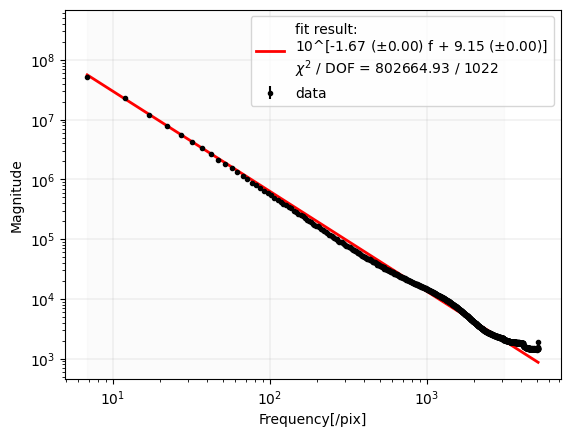

In [8]:
_=plot_pix_scale(fbin, rbin, err, params, errors, chi2, dof, fmin, fmax)